In [18]:
from qiskit import *

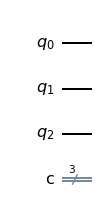

In [19]:
# Build a quantum circuit containing 3 qubits and 3 classical bits

circuit = QuantumCircuit(3, 3)

# Print circuit
%matplotlib inline
circuit.draw(output = 'mpl')

In [20]:
# Start building the teleportation algorithm: we want to 'copy' the first qubit into the third.

# Start by changing the first qubit from stat |0> to |1>, so that we are copying the |1> state
# to the third qubit
circuit.x(0)
# circuit.x(0) # Uncomment this if to see that the teleportation also works for the \0> state.
circuit.barrier() # This adds a barrier after the first operation for better readability
circuit.draw(output = 'mpl')

In [21]:
# Add a Hadamard gate on the second qubit to transform it from the |0> state to the |+> state
circuit.h(1)

# Add a CNOT gate between the second and third qubits. This means that there is a 50% chance
# for the third qubit to change state from |0> to |1>.
circuit.cx(1,2)
circuit.draw(output = 'mpl')

### The current state of the system of three qubits is:
### 1/sqrt(2) * ( |100> + |111> )

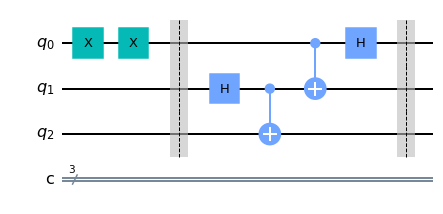

In [22]:
# Add a CNOT gate between the first and second qubits. Since we have transformed the state 
# of the first qubit to |1>, this means that the state of the second qubit is flipped
circuit.cx(0, 1)

# We then apply a Hadamard transform to the first qubit to change it from |1> to |->
circuit.h(0)
circuit.barrier()

circuit.draw(output = 'mpl')

### The state after the application of the second CNOT is:
### 1/sqrt(2) * ( |110> + |101> )
### And after the Hadamard transform it is:
### 1/2 * ( |010> - |110> + |001> - |101> )

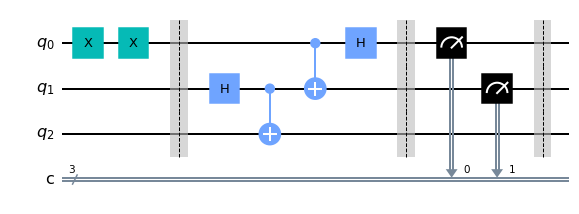

In [23]:
# We measure the first and second qubits. Note that the four states of the system which are
# in superposition prior to this measurement contain the four different combinations of the 
# first two bits: |01*>, -|11*>, |00*>, and -|10*>. Hence, the state of the 3 qubit system
# collapses to exactly one of the four states previously in superposition.
circuit.measure([0,1], [0,1])
circuit.barrier()

circuit.draw(output = 'mpl')

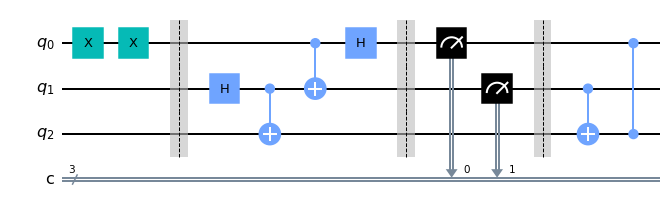

In [24]:
# We add a CNOT gate between the second and third qubits. Note that the state of the system
# at this point in the circuit has the second and third bits in the combination |*10> or |*01>,
# where the * star denotes the state of the first qubit. Thus, the state of the third qubit
# after this CNOT gate is definitely |1>, which is also the inital state of the first qubit.
circuit.cx(1, 2)

# We add a CZGate between the first and the third gate. What this does is to flip the phase
# of the third qubit if the first qubit is in state |1**>. We do this because the four states in 
# superposition after the second barrier contain states with inverted phases, specifically
# those with first qubit being in state |1**>.
circuit.cz(0, 2)

circuit.draw(output = 'mpl')

In [25]:
# Finally, we measure the state of the third qubit
circuit.measure(2, 2)

# We simulate the quantum circuit 1024 times and plot the results as a histogram.
# Note that the outputs of the measurements are given in reverse order to how they were
# performed.
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()

counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

### Note that measurement of the third qubit is always 1, which was the state the first qubit started with. Thus, the state has been teleported between the qubits successfully.